In [87]:
import torch
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

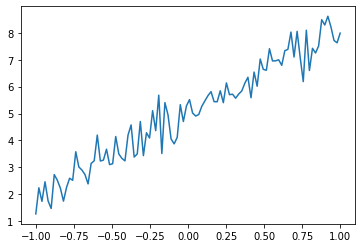

In [105]:
N = 100
x = np.linspace(-1, 1, N)
y = 3 * x + np.random.normal(0, 0.5, size=N) + 5
plt.plot(x, y)

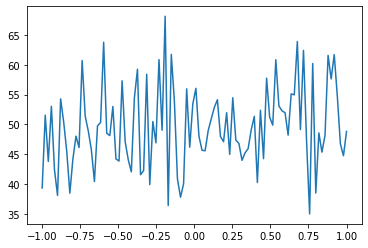

In [163]:
plt.plot(x, (y-3*x+2)**2)

In [159]:
class LinearModel:
    def __call__(self, x):
        return self.Weight * x + self.Bias

    def __init__(self, w_ini=5.0, b_ini=2.0):
        self.Weight = tf.Variable(w_ini)
        self.Bias = tf.Variable(b_ini)
        
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))

linear_model = LinearModel()

In [160]:
t = tf.GradientTape()

In [161]:
with tf.GradientTape() as t:
    current_loss = loss(y, linear_model(x))

lr_weight, lr_bias = t.gradient(current_loss, [linear_model.Weight, linear_model.Bias])

In [162]:
lr_weight, lr_bias

(<tf.Tensor: shape=(), dtype=float32, numpy=1.2522465>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-6.0473228>)

In [97]:
@tf.function
def forward(x):
    return W * x + b

out_a = forward([1,0, 2, 3])
print(out_a)

tf.Tensor([1. 0. 2. 3.], shape=(4,), dtype=float32)


In [99]:
out_a.

<bound method Function.get_concrete_function of <tensorflow.python.eager.def_function.Function object at 0x128eaa450>>

In [ ]:
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))

def train(linear_model, x, y, lr=0.12):
    with tf.GradientTape() as t:
        current_loss = loss(y, linear_model(x))

    lr_weight, lr_bias = t.gradient(current_loss, [linear_model.Weight, linear_model.Bias])
    linear_model.Weight.assign_sub(lr * lr_weight)
    linear_model.Bias.assign_sub(lr * lr_bias)

In [72]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [73]:
y = x + 2
print(y)


tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [74]:
y.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

In [63]:
print(y.grad_fn)

In [65]:
z = y * y * 3

out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [66]:
out.backward()

In [69]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])
